# Earthquake prediction dataset EDA

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
data=pd.read_csv("D:\ictak_dsa\Dataset .csv")

In [6]:
data.shape

(99410, 23)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99410 entries, 0 to 99409
Data columns (total 23 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       99410 non-null  int64  
 1   time             99410 non-null  object 
 2   latitude         99410 non-null  float64
 3   longitude        99410 non-null  float64
 4   depth            99125 non-null  float64
 5   mag              99410 non-null  float64
 6   magType          99410 non-null  object 
 7   nst              28823 non-null  float64
 8   gap              39116 non-null  float64
 9   dmin             19178 non-null  float64
 10  rms              70667 non-null  float64
 11  net              99410 non-null  object 
 12  id               99410 non-null  object 
 13  updated          99410 non-null  object 
 14  place            98614 non-null  object 
 15  type             99410 non-null  object 
 16  horizontalError  17803 non-null  float64
 17  depthError  

In [20]:
data.isna().count()

Unnamed: 0         99410
time               99410
latitude           99410
longitude          99410
depth              99410
mag                99410
magType            99410
nst                99410
gap                99410
dmin               99410
rms                99410
net                99410
id                 99410
updated            99410
place              99410
type               99410
horizontalError    99410
depthError         99410
magError           99410
magNst             99410
status             99410
locationSource     99410
magSource          99410
dtype: int64

In [19]:
data.dtypes

Unnamed: 0           int64
time                object
latitude           float64
longitude          float64
depth              float64
mag                float64
magType             object
nst                float64
gap                float64
dmin               float64
rms                float64
net                 object
id                  object
updated             object
place               object
type                object
horizontalError    float64
depthError         float64
magError           float64
magNst             float64
status              object
locationSource      object
magSource           object
dtype: object

In [21]:
data.head()

,Unnamed: 0,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,0,1900-10-09T12:25:00.000Z,57.09,-153.48,NaN,7.86,mw,NaN,NaN,NaN,...,2022-05-09T14:44:17.838Z,"16 km SW of Old Harbor, Alaska",earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,pt
1,1,1901-03-03T07:45:00.000Z,36.00,-120.50,NaN,6.40,ms,NaN,NaN,NaN,...,2018-06-04T20:43:44.000Z,"12 km NNW of Parkfield, California",earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,ell
2,2,1901-07-26T22:20:00.000Z,40.80,-115.70,NaN,5.00,fa,NaN,NaN,NaN,...,2018-06-04T20:43:44.000Z,"6 km SE of Elko, Nevada",earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,sjg
3,3,1901-12-30T22:34:00.000Z,52.00,-160.00,NaN,7.00,ms,NaN,NaN,NaN,...,2018-06-04T20:43:44.000Z,south of Alaska,earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,abe
4,4,1902-01-01T05:20:30.000Z,52.38,-167.45,NaN,7.00,ms,NaN,NaN,NaN,...,2018-06-04T20:43:44.000Z,"113 km ESE of Nikolski, Alaska",earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,abe


In [22]:
data.corr()

C:\Users\USER\AppData\Local\Temp\ipykernel_11140\2627137660.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data.corr()


,Unnamed: 0,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
Unnamed: 0,1.000000,-0.173379,-0.014121,-0.006282,-0.296785,-0.049293,-0.201736,0.063154,-0.221608,-0.135076,-0.399120,-0.739337,0.329494
latitude,-0.173379,1.000000,0.195841,-0.116858,0.051651,0.353992,0.002612,-0.360018,-0.074782,-0.180497,0.051794,0.193477,0.192117
longitude,-0.014121,0.195841,1.000000,-0.082859,-0.000310,0.008111,-0.192315,-0.119517,-0.018559,-0.064135,0.018644,0.036905,-0.013047
depth,-0.006282,-0.116858,-0.082859,1.000000,-0.018191,0.163438,-0.157978,-0.077051,-0.018547,0.053536,-0.032168,-0.077295,0.036729
mag,-0.296785,0.051651,-0.000310,-0.018191,1.000000,0.524283,-0.314572,-0.019960,0.049275,-0.053977,0.175834,0.459750,-0.016154
nst,-0.049293,0.353992,0.008111,0.163438,0.524283,1.000000,-0.428906,-0.056578,-0.020171,-0.113125,-0.186031,-0.342728,0.497582
gap,-0.201736,0.002612,-0.192315,-0.157978,-0.314572,-0.428906,1.000000,-0.013578,0.033373,0.235872,0.293234,0.337187,-0.116981
dmin,0.063154,-0.360018,-0.119517,-0.077051,-0.019960,-0.056578,-0.013578,1.000000,-0.036534,0.293831,-0.136893,0.088659,-0.036787
rms,-0.221608,-0.074782,-0.018559,-0.018547,0.049275,-0.020171,0.033373,-0.036534,1.000000,0.227353,0.060316,-0.042973,-0.089082
horizontalError,-0.135076,-0.180497,-0.064135,0.053536,-0.053977,-0.113125,0.235872,0.293831,0.227353,1.000000,0.274610,0.202632,-0.010714


C:\Users\USER\AppData\Local\Temp\ipykernel_11140\1794321463.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


<Axes: >

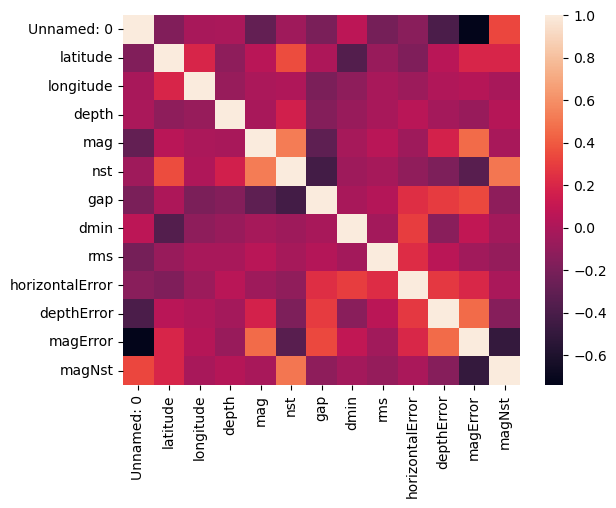

In [23]:
sns.heatmap(data.corr())